<a href="https://colab.research.google.com/github/Michael-C-1/Final-Project/blob/main/BCS109_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We tried to contact Mr. DellaRocca, but he didn't respond.

**Project To-do List**
1. ~~Find a dataset that is satisfactory~~
2. ~~Upload your data set to github and then to python (Colab or Jupyter)~~
3. ~~(Julia) Explain your data using textboxes (make sure to explain everything that you are doing - do some research to become a "expert", so that you know what is meaningful with this data).~~
4. ~~(Julia) Analyze your data for missing data or errors, etc.~~
5. ~~(Julia) Impute the data~~
6. ~~(Julia) Get the statistics and a basic analysis of what is going on~~
7. ~~Do some charts, correlations, etc.~~
8. ~~Answer 3 questions with your data using Python to provide a solution that you explain with text boxes as well as commented code~~
9. ~~Do regression to test whether one of your variables can be explained via this model.~~ 
10. ~~Evaluate your model~~

In [ ]:
#project outline
#https://github.com/MatthewFried/Udemy/blob/master/Foundation/_12_Step_by_Step_Data_Anaylsis.ipynb
#extra info about using the libraries
#https://github.com/MatthewFried/Udemy/blob/master/Foundation/_11%20Libraries_and_Review.ipynb
#dataset source
#https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29
#raw file
#https://raw.githubusercontent.com/brandjula/BCS109-FALL-2020/master/drugs_data_set_v2.csv

In [ ]:
#load numpy and panda libraries
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

df=pd.read_csv('https://raw.githubusercontent.com/brandjula/BCS109-FALL-2020/master/drugs_data_set_v2.csv')

#creating a second copy of the data
dfSub = df

#checking the dimensions of the data
print('The dimensions are: ', df.shape)

#show the first five rows of the data
df.head()

#The column names are: ID, drugName, condition, review, rating, date, usefulCount

The dimensions are:  (999, 7)


,ID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2/28/2012,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,5/17/2009,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,9/29/2017,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,3/5/2017,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,10/22/2015,4



**Descriptions**
*   Column **ID** is the id of the drug review.
*   Column **drugName** is the name of the drug taken. This can be either the generic (ex. Ibuprofen) or brand name (ex. Advil).
*   Column **condition** is the condition the drug taken was intended to treat. Examples include Depression, Birth Control, Osteoporosis. 
*   Column **review** is the text of the actual review.
*   Column **rating** is the rating of the drug by the patient on a 1-10 scale.
*   Column **date** is the date the review was posted. 
*   Column **usefulCount** is the amount of people that found the review useful.


In [ ]:
df.info()
#The columns ID, rating, and usefulCount are already float64. This makes our life a lot easier. All other columns are objects.

In [ ]:
#Check for empty data
df.isna().sum()

In [ ]:
#the only column with any missing values is the condition column. Let's pull those rows.
df[df["condition"].isnull()]

In [ ]:
#Those rows contain NaNs, which we can't use for analysis. Let's drop them, but only on a copy of the data set.
dfSub = df.copy()
dfDrop = dfSub.dropna()

In [ ]:
#check to see they were dropped:
dfDrop.isna().sum()

In [ ]:
#They were dropped. Let's see the averages of the numeric columns.
dfDrop.describe()

,ID,rating,usefulCount
count,995.000000,995.000000,995.000000
mean,121029.245226,7.072362,28.318593
std,67820.266954,3.261382,39.305055
min,397.000000,1.000000,0.000000
25%,61402.500000,5.000000,6.000000
50%,126043.000000,9.000000,15.000000
75%,180066.500000,10.000000,35.000000
max,232090.000000,10.000000,470.000000


In [ ]:
#The mean rating is a 7 out of 10, and the mean amount of users that found a review useful is 28.  Let's check for unique values.
dfDrop.nunique()

ID             995
drugName       486
condition      200
review         995
rating          10
date           833
usefulCount    127
dtype: int64

In [ ]:
#Even though we dropped the NaN's, we lost valuable data to learn from. Let's Impute the values. 
#First, we make a copy of the original data to test on:
dfImp = df.copy()

In [ ]:
#import the SimpleImputer library
from sklearn.impute import SimpleImputer

#the imputer with the strategy you want
imp = SimpleImputer( missing_values = nm.nan, strategy='most_frequent')

dfImp = pd.DataFrame(imp.fit_transform(dfImp))
dfImp.columns = ['ID', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount']

In [ ]:
#let's check the rows we imputed:
dfImp.loc[dfImp['ID'] == 77164]

,ID,drugName,condition,review,rating,date,usefulCount
34,77164,Lorcaserin,Birth Control,"""Have had back and leg pain and sometimes arm ...",5,5/27/2014,21


In [ ]:
dfImp.loc[dfImp['ID'] == 192374]

,ID,drugName,condition,review,rating,date,usefulCount
146,192374,Drospirenone / ethinyl estradiol,Birth Control,"""I hate this birth control. I was originally t...",4,4/13/2015,8


In [ ]:
dfImp.loc[dfImp['ID'] == 165767]

,ID,drugName,condition,review,rating,date,usefulCount
156,165767,Levonorgestrel,Birth Control,"""I&#039;ve never had kids and I am 32 fyi. The...",7,4/3/2017,0


In [ ]:
dfImp.loc[dfImp['ID'] == 157589]

,ID,drugName,condition,review,rating,date,usefulCount
779,157589,Guaifenesin,Birth Control,"""You&#039;ll almost always notice a medicinal ...",9,2/23/2010,10


In [ ]:
#They were imputed sucessfully. Let's get the statistics of the categorical data.
print(dfImp['drugName'].value_counts())

Levonorgestrel    29
Etonogestrel      20
Zoloft            11
Nexplanon         11
Bupropion         10
                  ..
Kyleena            1
Xiidra             1
Norethindrone      1
Lysteda            1
Meclizine          1
Name: drugName, Length: 487, dtype: int64


In [ ]:
#the most common medication was Levonorgestrel, with 29 reviews. Doing the same for conditions:
print(dfImp['condition'].value_counts())

Birth Control                                 196
Depression                                     66
Anxiety                                        37
Pain                                           37
Acne                                           36
                                             ... 
Leukemia                                        1
0</span> users found this comment helpful.      1
Interstitial Cystitis                           1
Ankylosing Spondylitis                          1
Otitis Media                                    1
Name: condition, Length: 200, dtype: int64


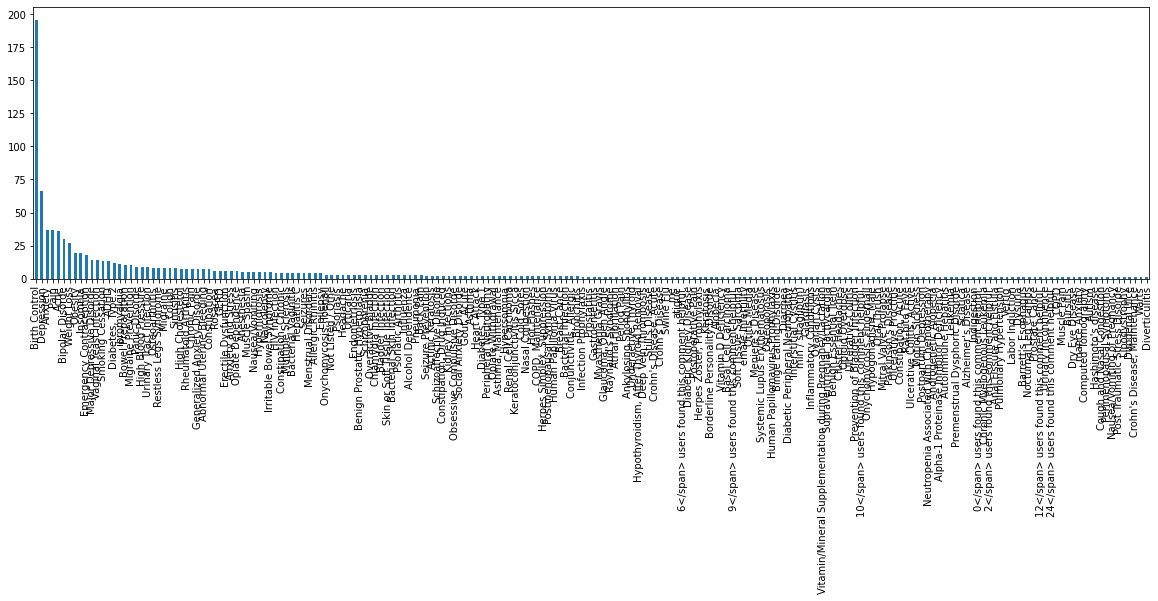

In [ ]:
#The most common 'condition' by far was Birth Control, at 196 rows. Depression only comes in at 66. Putting it visually:
plt.figure(figsize=(20,5))
dfImp['condition'].value_counts().plot(kind='bar', fontsize = 10)

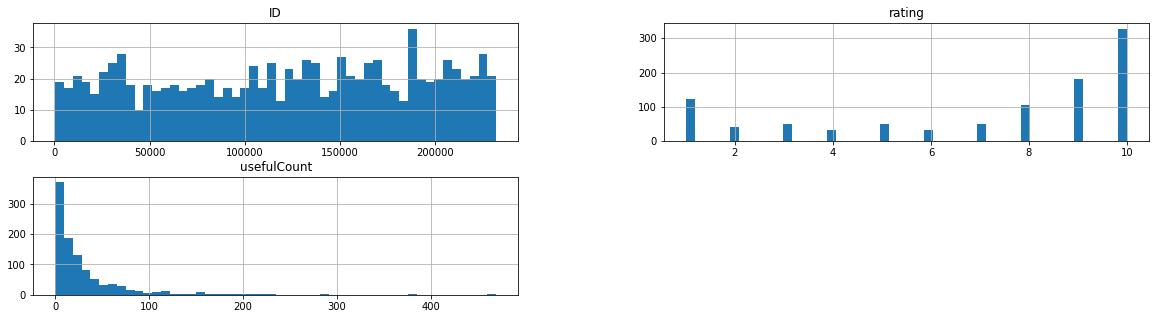

In [ ]:
df.hist(bins=50, figsize=(20, 5))
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


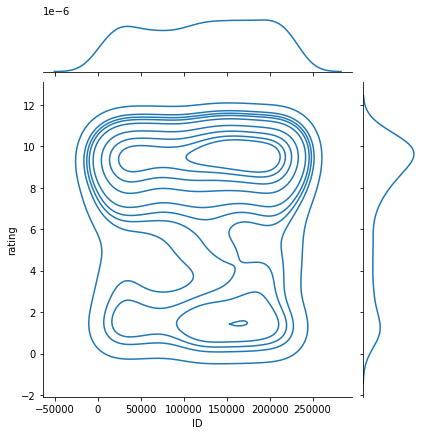

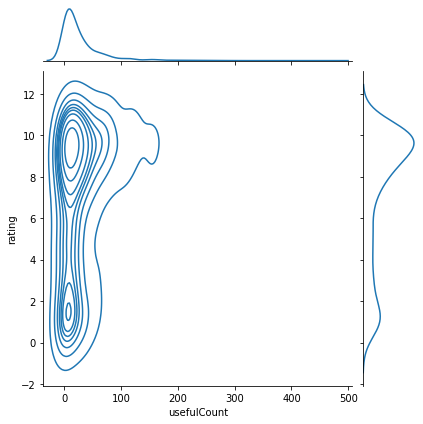

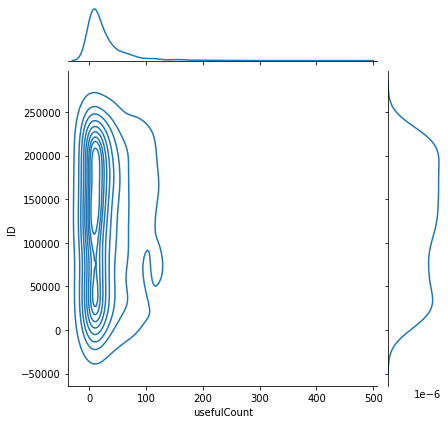

In [ ]:
def do_jointplot(df):
  a=sns.jointplot('ID', 'rating', df, kind='kde')
  b=sns.jointplot('usefulCount', 'rating', df, kind='kde')
  c=sns.jointplot('usefulCount', 'ID', df, kind='kde')
do_jointplot(df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


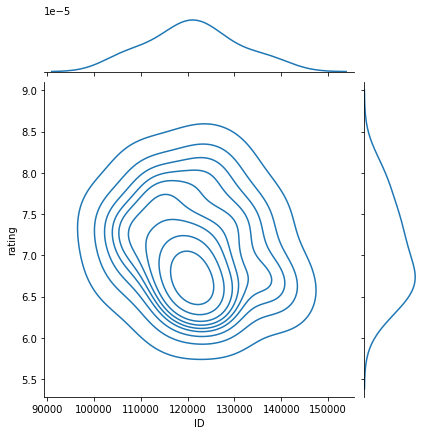

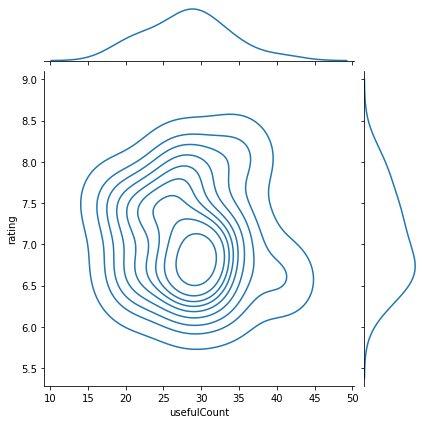

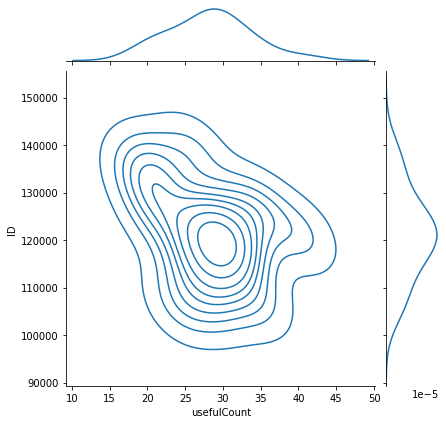

In [ ]:
numeric=['ID', 'rating', 'usefulCount']

def scale(df, N):
  a=[]
  for col in numeric:
    a.append(df[col].groupby(df[col].index//N).mean())
  scaled_df=pd.DataFrame(a)
  return scaled_df.transpose()

x=scale(df, 50)
do_jointplot(x)

In [ ]:
#Let's see if there's any correlation between the numeric variables
df.corr()

,ID,rating,usefulCount
ID,1.000000,-0.000443,-0.033145
rating,-0.000443,1.000000,0.198267
usefulCount,-0.033145,0.198267,1.000000


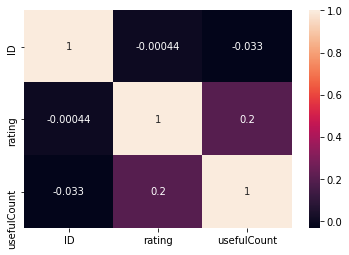

In [ ]:
corrmatrix=df.corr()
sns.heatmap(corrmatrix, annot=True)
plt.show()

There is a small amount of correlation between 'rating' and 'usefulCount', while there is much less correlation between them and 'ID'.

##What is the most common medication?

In [ ]:
print(dfImp['drugName'].value_counts())

Levonorgestrel    29
Etonogestrel      20
Zoloft            11
Nexplanon         11
Bupropion         10
                  ..
Kyleena            1
Xiidra             1
Norethindrone      1
Lysteda            1
Meclizine          1
Name: drugName, Length: 487, dtype: int64


The most common medication is Levonorgestrel.

##What is the most common condition?

In [ ]:
print(dfImp['condition'].value_counts())

Birth Control                                 196
Depression                                     66
Anxiety                                        37
Pain                                           37
Acne                                           36
                                             ... 
Leukemia                                        1
0</span> users found this comment helpful.      1
Interstitial Cystitis                           1
Ankylosing Spondylitis                          1
Otitis Media                                    1
Name: condition, Length: 200, dtype: int64


The most common 'condition' is Birth Control.

##What is the mean rating?

In [ ]:
dfDrop.describe()

,ID,rating,usefulCount
count,995.000000,995.000000,995.000000
mean,121029.245226,7.072362,28.318593
std,67820.266954,3.261382,39.305055
min,397.000000,1.000000,0.000000
25%,61402.500000,5.000000,6.000000
50%,126043.000000,9.000000,15.000000
75%,180066.500000,10.000000,35.000000
max,232090.000000,10.000000,470.000000


The mean rating is a little more than 7/10.

##Model

In [ ]:
#We need to scale the data before entering it into the model
from sklearn import preprocessing
dfDrop4=dfDrop.drop('condition', axis=1)
dfDrop3=dfDrop4.drop('drugName', axis=1)
dfDrop2=dfDrop3.drop('review', axis=1)
dfDrop1=dfDrop2.drop('date', axis=1)

min_max_scaler=preprocessing.MinMaxScaler()
z_scaled=min_max_scaler.fit_transform(dfDrop1)
df_scaled=pd.DataFrame(z_scaled)
df_scaled.columns=['ID', 'rating', 'usefulCount']
df_scaled.head()

,ID,rating,usefulCount
0,0.704998,1.000000,0.046809
1,0.889436,0.777778,0.036170
2,0.687440,0.888889,0.006383
3,0.167877,0.888889,0.074468
4,0.420259,0.888889,0.008511


In [ ]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           995 non-null    float64
 1   rating       995 non-null    float64
 2   usefulCount  995 non-null    float64
dtypes: float64(3)
memory usage: 23.4 KB


In [ ]:
y=df_scaled['rating']
y.head()

0    1.000000
1    0.777778
2    0.888889
3    0.888889
4    0.888889
Name: rating, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression

#take out rating, because that is what we are studying
df_scaled1=df_scaled.copy()
y=df_scaled1['rating']
X=df_scaled1.drop('rating', axis=1)

lin_reg=LinearRegression().fit(X,y)
r_sq=lin_reg.score(X,y)
print(r_sq)

0.03931680402664306


This model predicts around 4% of the data, which means this model doesn't fit the data.